#PROBLEMA DE LA CALIBRACIÓN DE BALANZAS

Contexto:
En las balanzas instaladas en los camiones mineros,algunos camiones presentaban descalibración o mal reporte de su peso que cargan los equipos.
Adicional a eso, se tenía que enviar camiones a cierto punto de descarga especial, en el cual se debía tener lectura del peso que esta descargando.
Por ende, se creo el siguiente codigo para determinar que camiones tienen una balanza mejor calibrada o menores errores.

#CODIGO

##LIBRERIAS

In [5]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import seaborn as sns
warnings.filterwarnings("ignore")

##IMPORTAMOS DATASET Y PREPROCESAMOS LA INFORMACION

In [8]:
from google.colab import files
uploaded = files.upload()

Saving DESCARGAS_ELN.xlsx to DESCARGAS_ELN.xlsx


In [9]:
df=pd.read_excel('DESCARGAS_ELN.xlsx')
df.head(5)

,Año,Mes,Fecha,shiftdate,Turno,Descarga,Origen,Destino,Ton_Med,Years,...,RecAu_Pond,RecAu_Pond_Met,ddbkey,Pala,Camion,Time_Llegada_C,Time_llegada_D,Time_Descarga_D,Tiem_Salida_D,Hr_Viaje
0,2022,7,22-JUL-22 D,2022-07-22,D,CR PRIMARIA 2,SP-3990-001-03-M3A,CR PRIMARIA 2,0,2022,...,0.0,0,120040,S07,T17,15.134444,15.512500,15.512500,15.526944,0.392500
1,2022,7,22-JUL-22 D,2022-07-22,D,CR PRIMARIA 2,SP-3990-001-03-M3A,CR PRIMARIA 2,0,2022,...,0.0,0,119314,S07,T14,14.971111,15.305278,15.305278,15.305278,0.334167
2,2022,7,22-JUL-22 D,2022-07-22,D,CR PRIMARIA 2,SP-3990-001-03-M3A,CR PRIMARIA 2,200,2022,...,0.0,0,118830,S07,T13,14.827778,15.124444,15.124444,15.124444,0.296667
3,2022,7,22-JUL-22 D,2022-07-22,D,CR PRIMARIA 2,SP-3990-001-03-M3A,CR PRIMARIA 2,0,2022,...,0.0,0,117378,S07,T14,14.247500,14.521111,14.521111,14.521111,0.273611
4,2022,7,22-JUL-22 D,2022-07-22,D,CR PRIMARIA 2,SP-3990-001-03-M3A,CR PRIMARIA 2,192,2022,...,0.0,0,116894,S07,T13,14.128333,14.422222,14.422222,14.422222,0.293889


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134999 entries, 0 to 134998
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Año              134999 non-null  int64         
 1   Mes              134999 non-null  int64         
 2   Fecha            134999 non-null  object        
 3   shiftdate        134999 non-null  datetime64[ns]
 4   Turno            134999 non-null  object        
 5   Descarga         134999 non-null  object        
 6   Origen           134999 non-null  object        
 7   Destino          134999 non-null  object        
 8   Ton_Med          134999 non-null  int64         
 9   Years            134999 non-null  int64         
 10  Ton_FC           134999 non-null  int64         
 11  Tons             134999 non-null  int64         
 12  Au_Pond          134999 non-null  float64       
 13  Ag_Pond          134999 non-null  float64       
 14  Cu_Pond          134

In [11]:
df.describe()

,Año,Mes,shiftdate,Ton_Med,Years,Ton_FC,Tons,Au_Pond,Ag_Pond,Cu_Pond,...,S_Pond,Stot_Pond,RecAu_Pond,RecAu_Pond_Met,ddbkey,Time_Llegada_C,Time_llegada_D,Time_Descarga_D,Tiem_Salida_D,Hr_Viaje
count,134999.000000,134999.000000,134999,134999.000000,134999.000000,134999.000000,134999.000000,134999.000000,134999.000000,134999.000000,...,134999.000000,134999.000000,134999.000000,134999.000000,134999.000000,133164.000000,134999.000000,134999.000000,134999.000000,133164.000000
mean,2022.732717,7.422929,2023-04-22 15:14:39.126512128,105.884147,2022.732717,182.863947,182.863947,1.023269,1.233480,180.232146,...,60.153234,2.723659,4.829868,1733.566552,153156.646731,12.999928,13.247969,13.247973,13.286002,0.358086
min,2022.000000,1.000000,2022-06-04 00:00:00,0.000000,2022.000000,150.000000,150.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,51362.000000,7.000000,7.000000,7.000000,7.000000,0.000000
25%,2022.000000,6.000000,2022-11-22 00:00:00,0.000000,2022.000000,185.000000,185.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,123040.000000,10.177500,10.393056,10.393056,10.432500,0.184167
50%,2023.000000,7.000000,2023-06-05 00:00:00,167.000000,2023.000000,185.000000,185.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,153838.000000,12.974722,13.221389,13.221389,13.263056,0.290833
75%,2023.000000,9.000000,2023-08-30 00:00:00,186.000000,2023.000000,185.000000,185.000000,1.450000,1.056000,24.000000,...,0.768000,0.000000,0.000000,0.000000,177995.000000,15.941667,16.227501,16.227501,16.265695,0.495556
max,2023.000000,12.000000,2023-12-14 00:00:00,299.000000,2023.000000,185.000000,185.000000,18.469999,22.598999,5290.000000,...,8500.019531,1872.390015,9826.000000,104634.000000,281300.000000,18.982779,18.997778,18.997778,18.999445,11.914166
std,0.442543,2.602081,NaN,90.583142,0.442543,8.378523,8.378523,1.860790,2.561771,579.568525,...,437.041371,64.573695,215.574109,11448.830188,38023.937526,3.274312,3.312767,3.312766,3.312279,0.317743


In [12]:
df.describe(include=['O'])

,Fecha,Turno,Descarga,Origen,Destino,Pala,Camion
count,134999,134999,134999,134999,134999,134999,134999
unique,944,2,230,490,230,7,17
top,01-JUL-23 D,D,CR PRIMARIA 2,ORE-BIN-M2,CR PRIMARIA 2,S04,T04
freq,345,71671,20660,20831,20660,33819,10783


In [13]:
#LAS COLUMNAS A ANALIZAR SON TON_MED , AÑO , MES ,DESCARGA ,CAMION
df[['Ton_Med','Año','Mes','Descarga','Camion']].isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134999 entries, 0 to 134998
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Ton_Med   134999 non-null  bool 
 1   Año       134999 non-null  bool 
 2   Mes       134999 non-null  bool 
 3   Descarga  134999 non-null  bool 
 4   Camion    134999 non-null  bool 
dtypes: bool(5)
memory usage: 659.3 KB


In [14]:
df['Ton_Med'].unique()

array([  0, 200, 192, 189, 191, 201, 195, 169, 181, 183, 160, 198, 175,
       188, 187, 186, 193, 197, 196, 215, 202, 204, 184, 194, 203, 180,
       174, 185, 207, 182, 178, 143, 129, 171, 108, 111, 113, 120, 147,
        69, 123, 146, 172, 145, 141, 125, 138, 134,  58,   4, 173,  50,
        63,  93,  66,  90,  54,  82, 150, 167, 158, 164, 176, 177, 179,
       168, 155, 165, 170, 190, 114, 152, 140, 162, 210, 159, 156, 116,
       106,  30, 213, 199, 161, 209, 206, 218, 219, 217, 211, 231, 208,
        46, 216, 132, 131, 144, 149, 133, 126, 153, 135, 222,  34, 212,
       115, 122, 137, 127, 154, 117,  92, 148, 124,  95,  49, 225, 224,
       221, 239, 205, 151, 107,  13, 157,  96, 105,   6,   7,   9,   8,
        10, 119, 128, 166,  99,  65,  84, 214, 110,  89,  87,  80, 130,
        39,  16,  27,  14,  20,  81,  47, 139,  48, 104,  11, 220,   5,
       142, 163,  72, 102,  98, 101,  24, 227, 121,  68,  77,  83, 223,
       226, 237,   2, 234,  75, 228,  78, 118, 103, 100,  57,  4

In [15]:
df['Año'].unique()

array([2022, 2023])

In [16]:
df['Mes'].unique()

array([ 7, 10,  9,  8,  6, 11, 12,  1,  2,  3,  4,  5])

In [17]:
df['Descarga'].unique()

array(['CR PRIMARIA 2           ', 'S-4120-002-01-M3B       ',
       'S-4000-001-01-M3B       ', 'S-4120-001-01-M3B       ',
       'S-4000-011-01-M3B       ', 'F7A-4180-S03            ',
       'F7-RAMPA-4180           ', 'S-3990-011-01-M3B       ',
       'F7A-4180-S02            ', 'F7A-4180-005            ',
       'F7A-4180-002            ', 'F2-4250-001             ',
       'S-4000-011-02-M3B       ', 'S-3985-001-01-M3A       ',
       'F7A-4190-010            ', 'S-4120-003-01-M3B       ',
       'F7A-4190-003            ', 'INPAD-4250              ',
       'INPIT-4000              ', 'BOT-BADEN               ',
       'RELL-RAMPA-3980         ', 'F7A-4180-001            ',
       'S-RAMPA-MELANI-M3B      ', 'INPIT-DAFNE             ',
       'INPIT-4010              ', 'F7A-4190-001            ',
       'BOT-PUENTE-4000         ', 'CR PRIMARIA             ',
       'F7A-4180-S3             ', 'F7A-4190-002            ',
       'S-4010-001-02-M3B       ', 'S-4100-024-01-M3B  

In [18]:
#ELIMINAMOS LOS ESPACIOS EN BLANCO DE LOS DATOS EN LA COLUMNA DESCARGA
df['Descarga']=[s.strip() for s in df['Descarga']]
df['Descarga'].unique()


array(['CR PRIMARIA 2', 'S-4120-002-01-M3B', 'S-4000-001-01-M3B',
       'S-4120-001-01-M3B', 'S-4000-011-01-M3B', 'F7A-4180-S03',
       'F7-RAMPA-4180', 'S-3990-011-01-M3B', 'F7A-4180-S02',
       'F7A-4180-005', 'F7A-4180-002', 'F2-4250-001', 'S-4000-011-02-M3B',
       'S-3985-001-01-M3A', 'F7A-4190-010', 'S-4120-003-01-M3B',
       'F7A-4190-003', 'INPAD-4250', 'INPIT-4000', 'BOT-BADEN',
       'RELL-RAMPA-3980', 'F7A-4180-001', 'S-RAMPA-MELANI-M3B',
       'INPIT-DAFNE', 'INPIT-4010', 'F7A-4190-001', 'BOT-PUENTE-4000',
       'CR PRIMARIA', 'F7A-4180-S3', 'F7A-4190-002', 'S-4010-001-02-M3B',
       'S-4100-024-01-M3B', 'S-4055-027-01-M3A', 'BOT-RAMPA Z',
       'S-3990-001-01-M3A', 'S-4010-001-01-M3A', 'S-3990-001-01-M3B',
       'S-4120-003-01-M3A', 'S-4055-031-01-M3A', 'INPAD-4190',
       'INPAD-RAMPA', 'F6A-4190-002', 'S-4120-010-01-M3B',
       'S-W-4090-099-01-M3B', 'SP-4120-003-02-M3A', 'S-4120-001-01-M3A',
       'INPIT CONST', 'S-4155-020-01-M3B', 'F7A-4170-001', 'BOT-BA

In [19]:
df['Camion'].unique()

array(['T17         ', 'T14         ', 'T13         ', 'T03         ',
       'T11         ', 'T06         ', 'T05         ', 'T16         ',
       'T01         ', 'T04         ', 'T09         ', 'T02         ',
       'T07         ', 'T12         ', 'T15         ', 'T22         ',
       'T21         '], dtype=object)

In [20]:
df['Camion']=[s.strip() for s in df['Camion']]
df['Camion'].unique()

array(['T17', 'T14', 'T13', 'T03', 'T11', 'T06', 'T05', 'T16', 'T01',
       'T04', 'T09', 'T02', 'T07', 'T12', 'T15', 'T22', 'T21'],
      dtype=object)

#ANALISIS DE LA VARIABLE TON_MED, QUE REGISTRA LOS TONELAJES DE LAS BALANZAS EN EL SISTEMA

In [21]:
#SE TOMARÁ SOLO 3 MESES DE DATA HISTORICA DEL 2023
MES=[8,9,10]
AÑO=2023
df=df[(df['Mes'].isin(MES)) & (df['Año']==AÑO)]
df

,Año,Mes,Fecha,shiftdate,Turno,Descarga,Origen,Destino,Ton_Med,Years,...,RecAu_Pond,RecAu_Pond_Met,ddbkey,Pala,Camion,Time_Llegada_C,Time_llegada_D,Time_Descarga_D,Tiem_Salida_D,Hr_Viaje
56146,2023,8,06-AGO-23 D,2023-08-06,D,F6A-4210-008,SP-4145-010-02-M3B,F6A-4210-008,187,2023,...,0.0,0,170940,S01,T16,18.161388,18.667500,18.667500,18.693333,0.531944
56147,2023,8,06-AGO-23 D,2023-08-06,D,F6A-4210-008,SP-4145-010-02-M3B,F6A-4210-008,0,2023,...,0.0,0,171424,S01,T06,18.322779,18.804722,18.804722,18.822779,0.500000
56148,2023,8,06-AGO-23 D,2023-08-06,D,F6A-4210-008,SP-4145-010-02-M3B,F6A-4210-008,183,2023,...,0.0,0,171908,S01,T05,18.432501,18.880556,18.880556,18.898333,0.465833
56149,2023,8,06-AGO-23 N,2023-08-06,N,F6A-4210-008,SP-4145-010-02-M3BH,F6A-4210-008,0,2023,...,0.0,0,125406,S01,T16,7.000000,7.382222,7.382222,7.382222,0.382222
56150,2023,8,06-AGO-23 N,2023-08-06,N,F6A-4210-008,SP-4145-010-02-M3BH,F6A-4210-008,0,2023,...,0.0,0,126374,S01,T16,7.382222,7.948889,7.948889,7.998055,0.615833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134491,2023,10,29-OCT-23 N,2023-10-29,N,CONST-VILLA,BOT-RPZ-4060-01,CONST-VILLA,0,2023,...,0.0,0,143302,S07,T15,12.126667,12.918333,12.918333,12.933888,0.807222
134492,2023,10,29-OCT-23 N,2023-10-29,N,CONST-VILLA,BOT-RPZ-4060-01,CONST-VILLA,180,2023,...,0.0,0,146206,S07,T13,13.006111,13.824166,13.824166,13.825000,0.818889
134493,2023,10,29-OCT-23 N,2023-10-29,N,CONST-VILLA,BOT-RPZ-4060-01,CONST-VILLA,174,2023,...,0.0,0,151046,S07,T01,14.351389,15.951944,15.951944,15.966666,1.615278
134494,2023,10,29-OCT-23 N,2023-10-29,N,CONST-VILLA,BOT-RPZ-4060-01,CONST-VILLA,197,2023,...,0.0,0,152740,S07,T07,15.628333,16.491112,16.491112,16.509722,0.881389


Cantidad de datos mayores a 120: 18134
Cantidad de datos menores o iguales a 120: 11232


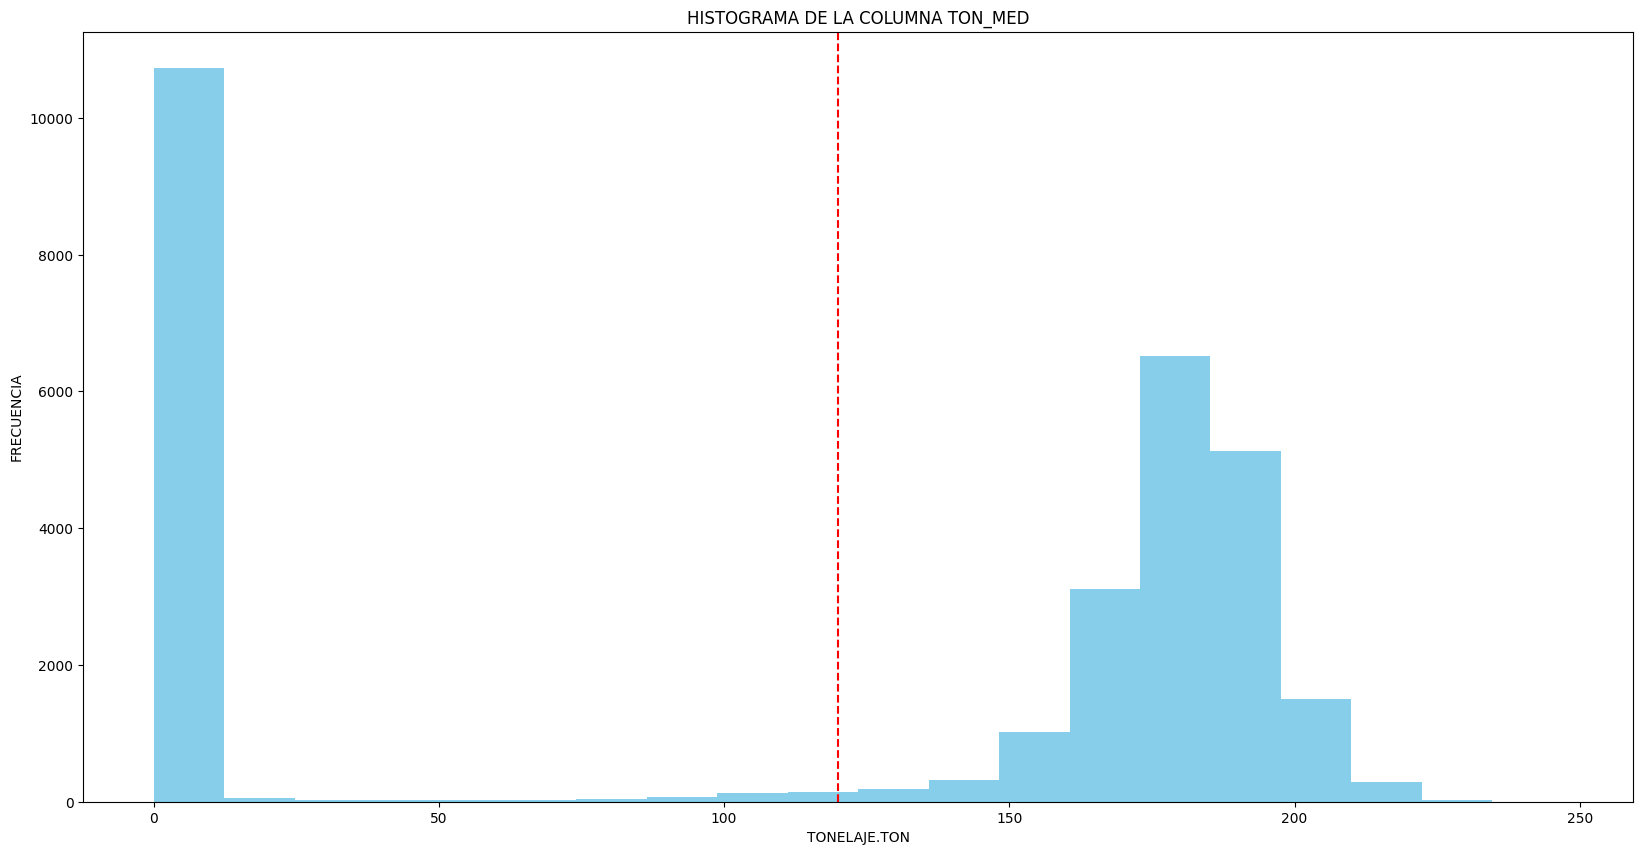

In [22]:
#HISTOGRAMAS DE FRECUENCIAS
plt.figure(figsize=(20,10))
plt.hist(df['Ton_Med'],bins=20,color='skyblue')
plt.title('HISTOGRAMA DE LA COLUMNA TON_MED')
plt.xlabel('TONELAJE.TON')
plt.ylabel('FRECUENCIA')
# Agregar una línea vertical en x=120
plt.axvline(x=120, color='red', linestyle='--')

# Calcular la cantidad de datos mayores y menores a 120
datos_mayores_120 = (df['Ton_Med'] > 120).sum()
datos_menores_120 = (df['Ton_Med'] <= 120).sum()
print("Cantidad de datos mayores a 120:", datos_mayores_120)
print("Cantidad de datos menores o iguales a 120:", datos_menores_120)

plt.show()

In [23]:
#SE TOMARÁ DOS CASOS
#CASO1 CONSIDERANDO LOS REGISTROS DE TON=0
#CASO2 NO CONSIDERANDO LOS REGISTROS TON=0

##CASO1(CONSIDERANDO LOS REGISTROS DE TON_MED=0)

In [24]:
#CASO 1
df1=df
#cATEGORIZAMOS LOS VALORES TOMANDO 120TON
BINS=[df1['Ton_Med'].min()-1,120,df1['Ton_Med'].max()]
Labels=['MALO','BUENO']
#
df1['Ton_Class']=pd.cut(df['Ton_Med'],BINS,labels=Labels)
df1

,Año,Mes,Fecha,shiftdate,Turno,Descarga,Origen,Destino,Ton_Med,Years,...,RecAu_Pond_Met,ddbkey,Pala,Camion,Time_Llegada_C,Time_llegada_D,Time_Descarga_D,Tiem_Salida_D,Hr_Viaje,Ton_Class
56146,2023,8,06-AGO-23 D,2023-08-06,D,F6A-4210-008,SP-4145-010-02-M3B,F6A-4210-008,187,2023,...,0,170940,S01,T16,18.161388,18.667500,18.667500,18.693333,0.531944,BUENO
56147,2023,8,06-AGO-23 D,2023-08-06,D,F6A-4210-008,SP-4145-010-02-M3B,F6A-4210-008,0,2023,...,0,171424,S01,T06,18.322779,18.804722,18.804722,18.822779,0.500000,MALO
56148,2023,8,06-AGO-23 D,2023-08-06,D,F6A-4210-008,SP-4145-010-02-M3B,F6A-4210-008,183,2023,...,0,171908,S01,T05,18.432501,18.880556,18.880556,18.898333,0.465833,BUENO
56149,2023,8,06-AGO-23 N,2023-08-06,N,F6A-4210-008,SP-4145-010-02-M3BH,F6A-4210-008,0,2023,...,0,125406,S01,T16,7.000000,7.382222,7.382222,7.382222,0.382222,MALO
56150,2023,8,06-AGO-23 N,2023-08-06,N,F6A-4210-008,SP-4145-010-02-M3BH,F6A-4210-008,0,2023,...,0,126374,S01,T16,7.382222,7.948889,7.948889,7.998055,0.615833,MALO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134491,2023,10,29-OCT-23 N,2023-10-29,N,CONST-VILLA,BOT-RPZ-4060-01,CONST-VILLA,0,2023,...,0,143302,S07,T15,12.126667,12.918333,12.918333,12.933888,0.807222,MALO
134492,2023,10,29-OCT-23 N,2023-10-29,N,CONST-VILLA,BOT-RPZ-4060-01,CONST-VILLA,180,2023,...,0,146206,S07,T13,13.006111,13.824166,13.824166,13.825000,0.818889,BUENO
134493,2023,10,29-OCT-23 N,2023-10-29,N,CONST-VILLA,BOT-RPZ-4060-01,CONST-VILLA,174,2023,...,0,151046,S07,T01,14.351389,15.951944,15.951944,15.966666,1.615278,BUENO
134494,2023,10,29-OCT-23 N,2023-10-29,N,CONST-VILLA,BOT-RPZ-4060-01,CONST-VILLA,197,2023,...,0,152740,S07,T07,15.628333,16.491112,16.491112,16.509722,0.881389,BUENO


In [25]:

cantidad = df1['Ton_Class'].value_counts()
total_observaciones = df1['Ton_Class'].count()

# Calcular los porcentajes
porcentaje = (cantidad / total_observaciones) * 100

resultado = pd.concat([cantidad, porcentaje], axis=1)
resultado.columns = ['CONTEO', 'PORCENTAJE']

resultado

,CONTEO,PORCENTAJE
Ton_Class,,
BUENO,18134,61.751686
MALO,11232,38.248314


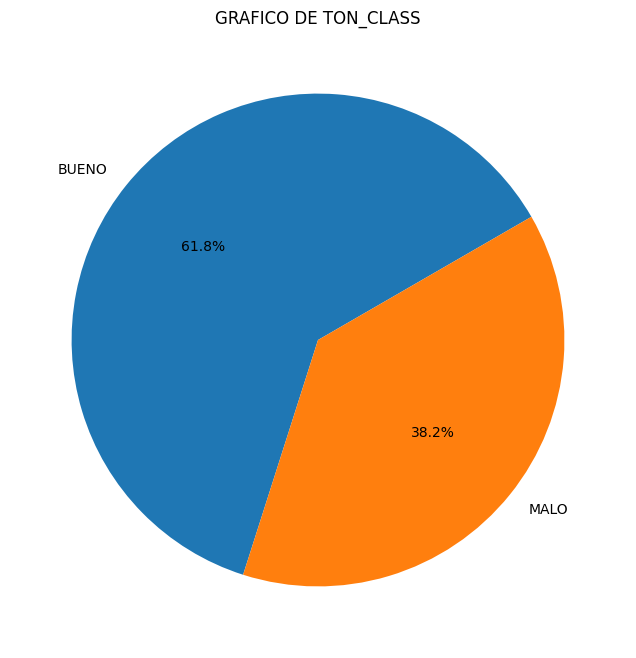

In [26]:
##GRAFICO PIE
plt.figure(figsize=(15,8))
plt.pie(cantidad,labels=cantidad.index,autopct='%1.1f%%',startangle=30)
plt.title('GRAFICO DE TON_CLASS')
plt.show()

In [27]:
df1_group=df1.groupby('Camion')
df1_agg=df1_group.agg(
    Bueno=pd.NamedAgg(column='Ton_Class',
                      aggfunc=lambda x:(x=='BUENO').sum()),
    Malo=pd.NamedAgg(column='Ton_Class',
                    aggfunc=lambda x:(x=='MALO').sum())
            )
df1_agg

,Bueno,Malo
Camion,,
T01,1799,324
T02,1388,247
T04,2016,251
T05,1786,329
T06,1501,309
T07,1654,380
T09,1559,141
T11,292,163
T12,1668,290


In [28]:
#CREAMOS LAS COLUMNAS TOTAL DE VIAJES Y EFICIENCIA DE BALANZA
df1_agg['TOTAL_VIAJES']=df1_agg['Bueno']+df1_agg['Malo']
df1_agg['EFFICIENCIA']=(df1_agg['Bueno']/df1_agg['TOTAL_VIAJES'])*100
df1_agg

,Bueno,Malo,TOTAL_VIAJES,EFFICIENCIA
Camion,,,,
T01,1799,324,2123,84.738577
T02,1388,247,1635,84.892966
T04,2016,251,2267,88.928099
T05,1786,329,2115,84.444444
T06,1501,309,1810,82.928177
T07,1654,380,2034,81.317601
T09,1559,141,1700,91.705882
T11,292,163,455,64.175824
T12,1668,290,1958,85.188968


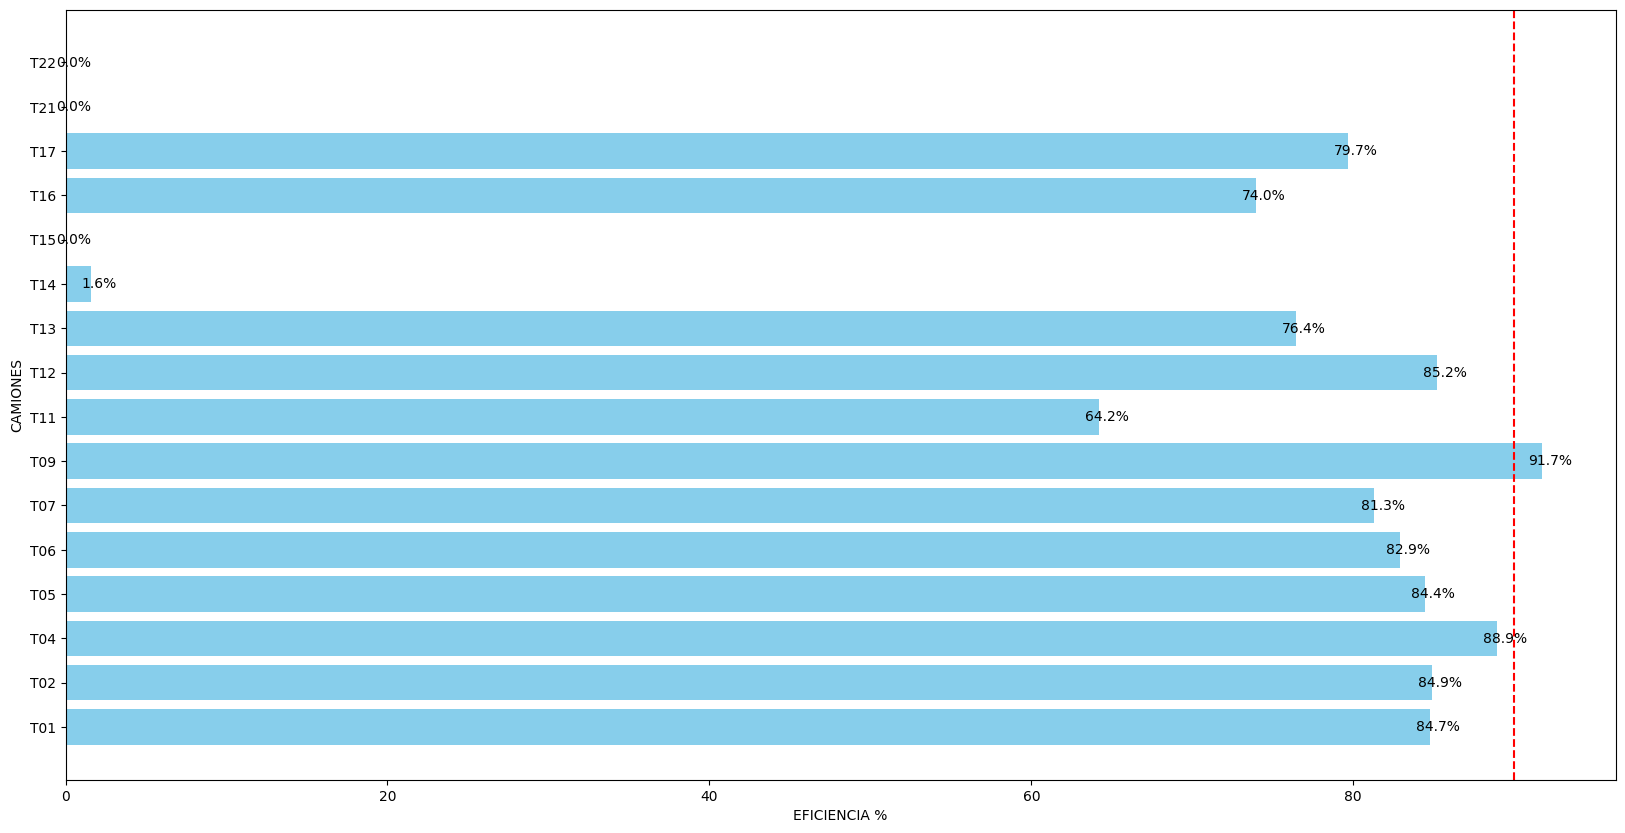

In [29]:
plt.figure(figsize=(20,10))
bars=plt.barh(df1_agg.index, df1_agg['EFFICIENCIA'],color='skyblue')
plt.axvline(x=90,color='red',linestyle='--')

# Agregar etiquetas de datos a cada barra
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}%',
             ha='center', va='center', color='black')
plt.xlabel('EFICIENCIA %')
plt.ylabel('CAMIONES')
plt.show()

##CASO2(NO CONSIDERANDO LOS REGISTROS DE TON_MED=0)

In [30]:
df2=df[df['Ton_Med']>0]
#cATEGORIZAMOS LOS VALORES TOMANDO 120TON
BINS2=[df2['Ton_Med'].min()-1,120,df2['Ton_Med'].max()]
Labels2=['MALO','BUENO']
#
df2['Ton_Class']=pd.cut(df['Ton_Med'],BINS2,labels=Labels2)
df2

,Año,Mes,Fecha,shiftdate,Turno,Descarga,Origen,Destino,Ton_Med,Years,...,RecAu_Pond_Met,ddbkey,Pala,Camion,Time_Llegada_C,Time_llegada_D,Time_Descarga_D,Tiem_Salida_D,Hr_Viaje,Ton_Class
56146,2023,8,06-AGO-23 D,2023-08-06,D,F6A-4210-008,SP-4145-010-02-M3B,F6A-4210-008,187,2023,...,0,170940,S01,T16,18.161388,18.667500,18.667500,18.693333,0.531944,BUENO
56148,2023,8,06-AGO-23 D,2023-08-06,D,F6A-4210-008,SP-4145-010-02-M3B,F6A-4210-008,183,2023,...,0,171908,S01,T05,18.432501,18.880556,18.880556,18.898333,0.465833,BUENO
56152,2023,8,06-AGO-23 N,2023-08-06,N,F6A-4210-008,SP-4145-010-02-M3BH,F6A-4210-008,2,2023,...,0,127584,S01,T14,7.603889,8.235556,8.235556,8.257778,0.653889,MALO
56154,2023,8,06-AGO-23 N,2023-08-06,N,F6A-4210-008,SP-4145-010-02-M3BH,F6A-4210-008,189,2023,...,0,128310,S07,T12,8.210834,8.728889,8.728889,8.742778,0.531944,BUENO
56156,2023,8,06-AGO-23 N,2023-08-06,N,F6A-4210-008,SP-4145-010-02-M3BH,F6A-4210-008,177,2023,...,0,128794,S01,T06,8.306945,8.841666,8.841666,8.891389,0.584444,BUENO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134490,2023,10,29-OCT-23 N,2023-10-29,N,CONST-VILLA,BOT-RPZ-4060-01,CONST-VILLA,195,2023,...,0,141366,S07,T13,11.449445,12.258611,12.258611,12.274167,0.824722,BUENO
134492,2023,10,29-OCT-23 N,2023-10-29,N,CONST-VILLA,BOT-RPZ-4060-01,CONST-VILLA,180,2023,...,0,146206,S07,T13,13.006111,13.824166,13.824166,13.825000,0.818889,BUENO
134493,2023,10,29-OCT-23 N,2023-10-29,N,CONST-VILLA,BOT-RPZ-4060-01,CONST-VILLA,174,2023,...,0,151046,S07,T01,14.351389,15.951944,15.951944,15.966666,1.615278,BUENO
134494,2023,10,29-OCT-23 N,2023-10-29,N,CONST-VILLA,BOT-RPZ-4060-01,CONST-VILLA,197,2023,...,0,152740,S07,T07,15.628333,16.491112,16.491112,16.509722,0.881389,BUENO


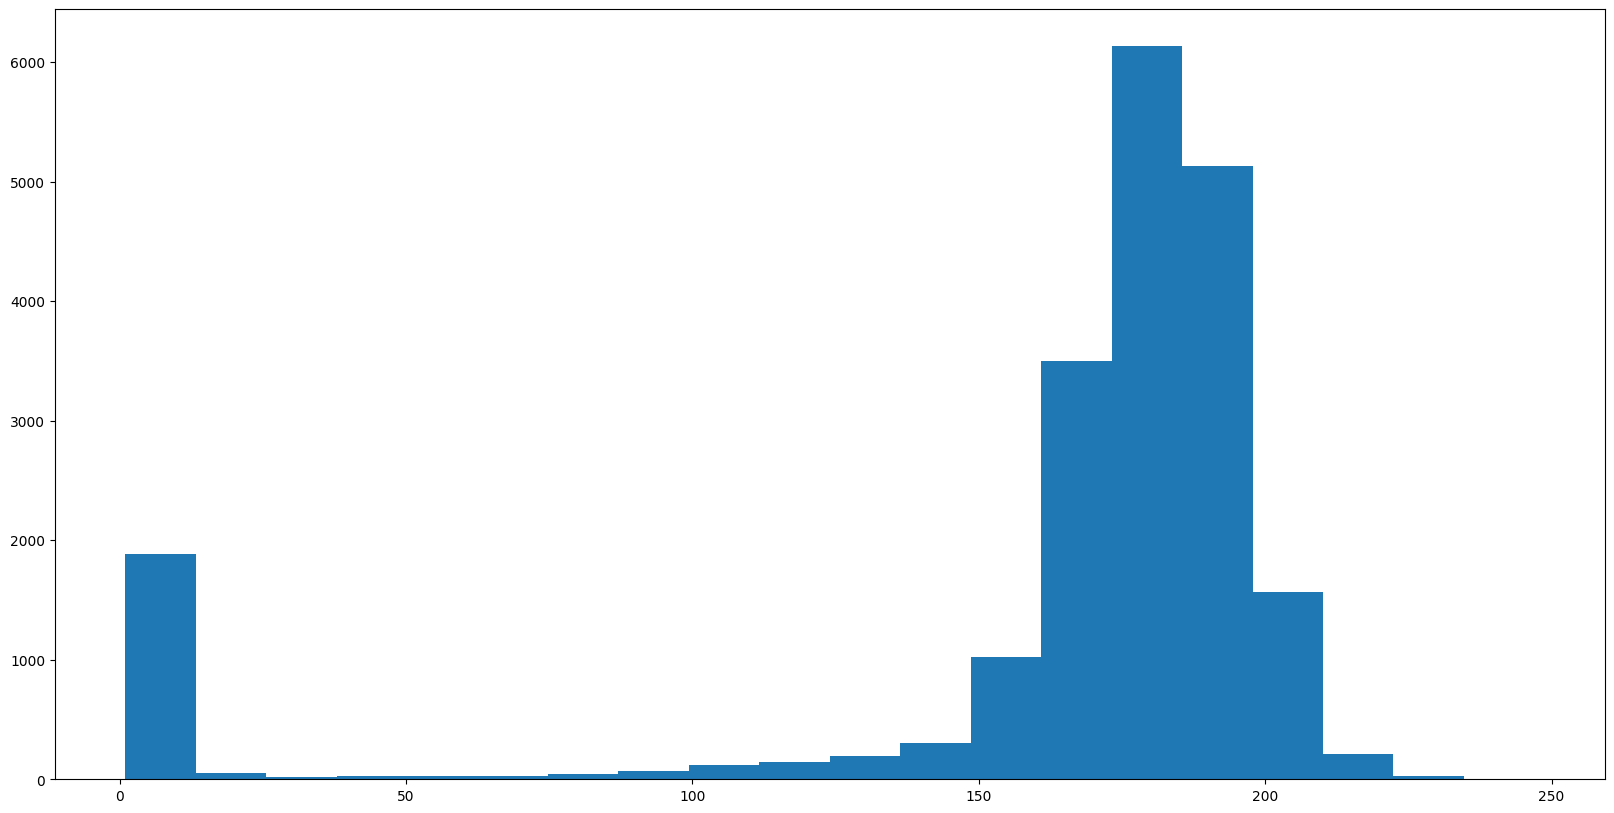

In [31]:
#EL CAMBIO DE LA DISTRIBUCIÓN DE FRECUENCIA DE LOS DATOS
plt.figure(figsize=(20,10))
plt.hist(df2['Ton_Med'],bins=20)
plt.show()

In [32]:
cantidad2=df2['Ton_Class'].value_counts()
total_observaciones2=df2['Ton_Class'].count()

porcentaje2=(cantidad2/total_observaciones2)*100

resultado2=pd.concat([cantidad2,porcentaje2],axis=1)
resultado2.columns=['Cantidad', 'Porcentaje']
resultado2

,Cantidad,Porcentaje
Ton_Class,,
BUENO,18134,88.363707
MALO,2388,11.636293


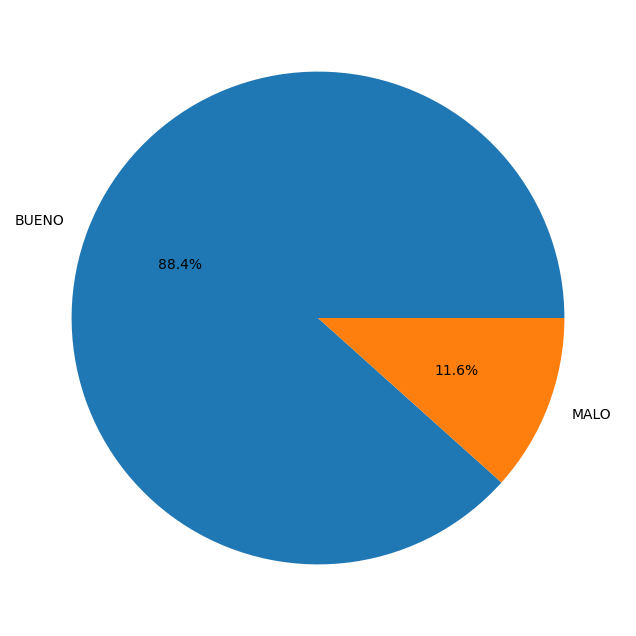

In [33]:
plt.figure(figsize=(15,8))
plt.pie(cantidad2,labels=cantidad2.index,autopct='%1.1f%%')
plt.show()

In [34]:
#COMENZAMOS A CREAR LA TABLA POR CAMION
df2_group=df2.groupby('Camion')
df2_agg=df2_group.agg(
            BUENO=pd.NamedAgg(column='Ton_Class',
                              aggfunc=lambda x:(x=='BUENO').sum()),
            MALO=pd.NamedAgg(column='Ton_Class',
                              aggfunc=lambda x:(x=='MALO').sum()))
df2_agg

,BUENO,MALO
Camion,,
T01,1799,28
T02,1388,23
T04,2016,67
T05,1786,22
T06,1501,23
T07,1654,148
T09,1559,51
T11,292,9
T12,1668,36


In [35]:
#AGREGAMOS LAS COLUMNAS
df2_agg['TOTAL_VIAJES']=df2_agg['BUENO']+df2_agg['MALO']
df2_agg['EFFICIENCIA']=(df2_agg['BUENO']/df2_agg['TOTAL_VIAJES'])*100
df2_agg

,BUENO,MALO,TOTAL_VIAJES,EFFICIENCIA
Camion,,,,
T01,1799,28,1827,98.467433
T02,1388,23,1411,98.369950
T04,2016,67,2083,96.783485
T05,1786,22,1808,98.783186
T06,1501,23,1524,98.490814
T07,1654,148,1802,91.786903
T09,1559,51,1610,96.832298
T11,292,9,301,97.009967
T12,1668,36,1704,97.887324


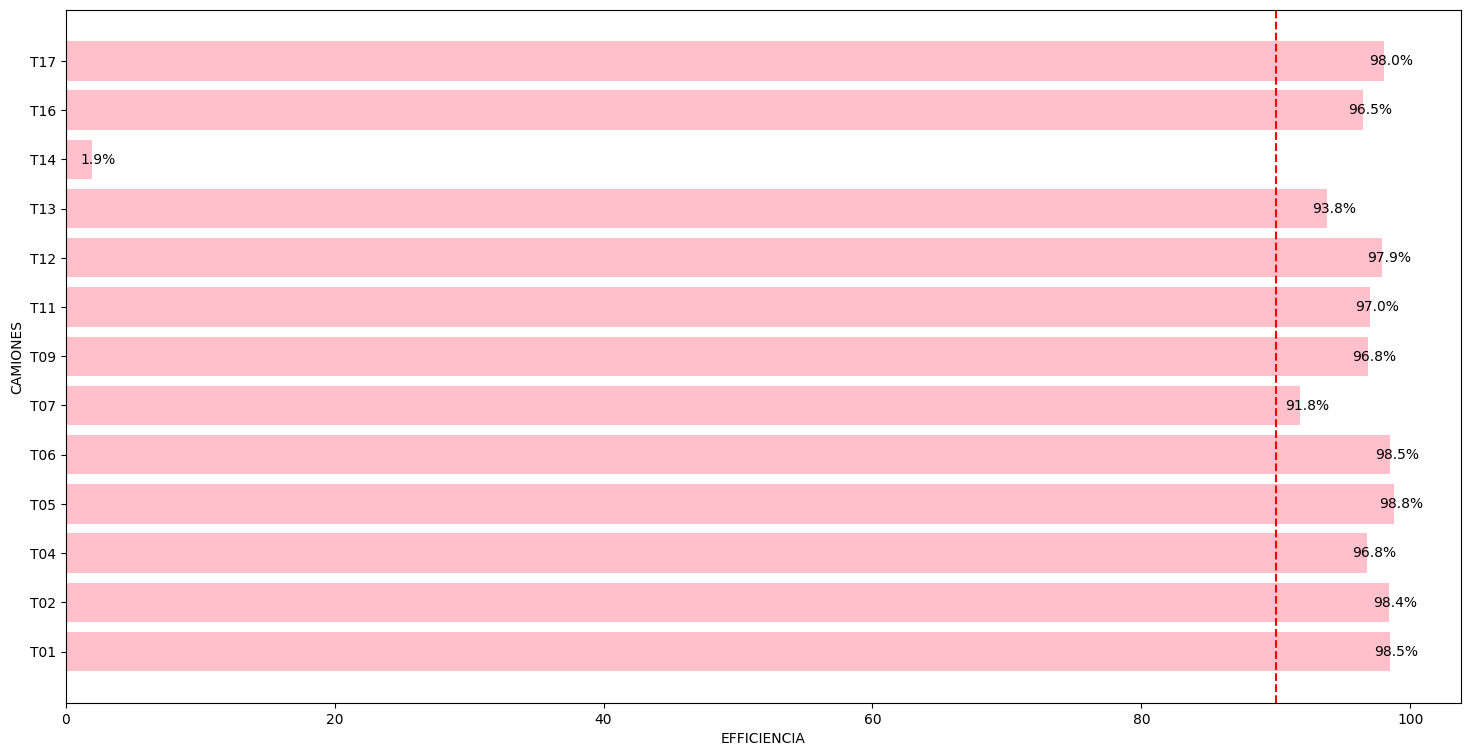

In [36]:
plt.figure(figsize=(18,9))
bars2=plt.barh(df2_agg.index,df2_agg['EFFICIENCIA'],color='pink')
plt.axvline(x=90,color='red',linestyle='--')
# Agregar etiquetas de datos a cada barra
for bar in bars2:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}%',
             ha='center', va='center', color='black')

plt.xlabel('EFFICIENCIA')
plt.ylabel('CAMIONES')
plt.show()

#CONCLUSIONES

In [37]:
# Combinamos los DATAFRAME DE LOS CASOS 1 Y 2
df_merged = pd.merge(df1_agg[['EFFICIENCIA']], df2_agg[['EFFICIENCIA']], on='Camion', suffixes=('_CASO1', '_CASO2'))

df_merged

,EFFICIENCIA_CASO1,EFFICIENCIA_CASO2
Camion,,
T01,84.738577,98.467433
T02,84.892966,98.369950
T04,88.928099,96.783485
T05,84.444444,98.783186
T06,82.928177,98.490814
T07,81.317601,91.786903
T09,91.705882,96.832298
T11,64.175824,97.009967
T12,85.188968,97.887324


In [38]:
#CREAMOS LA COLUMNA PROMEDIO
df_merged['PROMEDIO']=(df_merged['EFFICIENCIA_CASO1']+df_merged['EFFICIENCIA_CASO2'])/2
df_merged_sorted=df_merged.sort_values(by='PROMEDIO',ascending=False)
df_merged_sorted

,EFFICIENCIA_CASO1,EFFICIENCIA_CASO2,PROMEDIO
Camion,,,
T09,91.705882,96.832298,94.269090
T04,88.928099,96.783485,92.855792
T02,84.892966,98.369950,91.631458
T05,84.444444,98.783186,91.613815
T01,84.738577,98.467433,91.603005
T12,85.188968,97.887324,91.538146
T06,82.928177,98.490814,90.709495
T17,79.671656,98.039216,88.855436
T07,81.317601,91.786903,86.552252


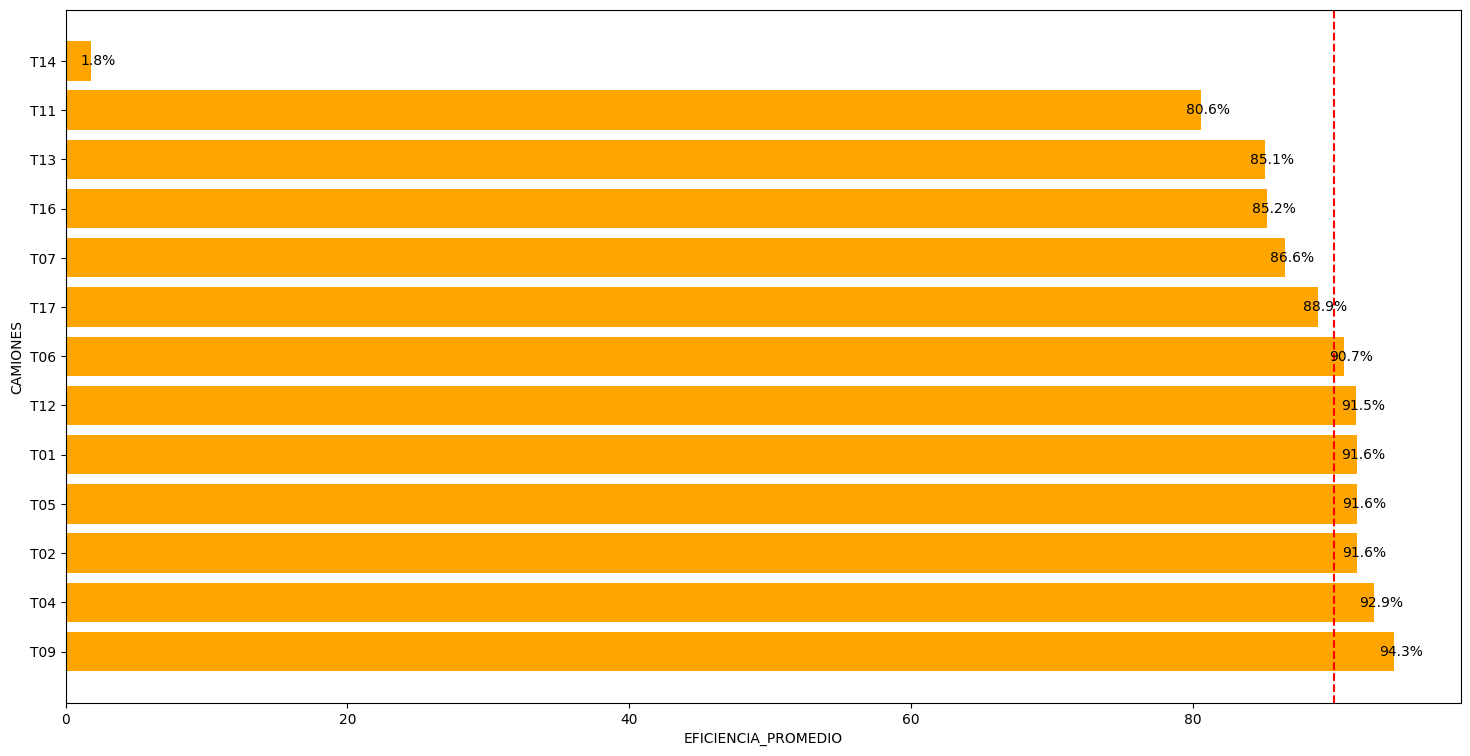

In [39]:
plt.figure(figsize=(18,9))
bars_merged=plt.barh(df_merged_sorted.index,df_merged_sorted['PROMEDIO'],color='orange')
plt.axvline(x=90,color='red',linestyle='--')
# Agregar etiquetas de datos a cada barra
for bar in bars_merged:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}%',
             ha='center', va='center', color='black')
plt.xlabel('EFICIENCIA_PROMEDIO')
plt.ylabel('CAMIONES')
plt.show()

-	En la data analiazada, basándonos en la cantidad de viajes realizados, se tiene que el camión T09, T04 son los recomendados para especificas tareas según la Tabla df_merged_sorte
-	Se tiene conocimiento que el camión T15,T21 y T22, no presenta balanza, pero es sabido que el camión T14, si presenta balanza, por ende es necesario una calibración para su funcionamiento.
-	Se desestimo ciertos camiones (T11) en la categorización , debido a que no cuentan con una gran cantidad de viajes a comparación de los demás equipos.

